In [1]:
# get matplotlib configuration
%run plot_conf.py

In [2]:
import numpy as np
import skvideo.io

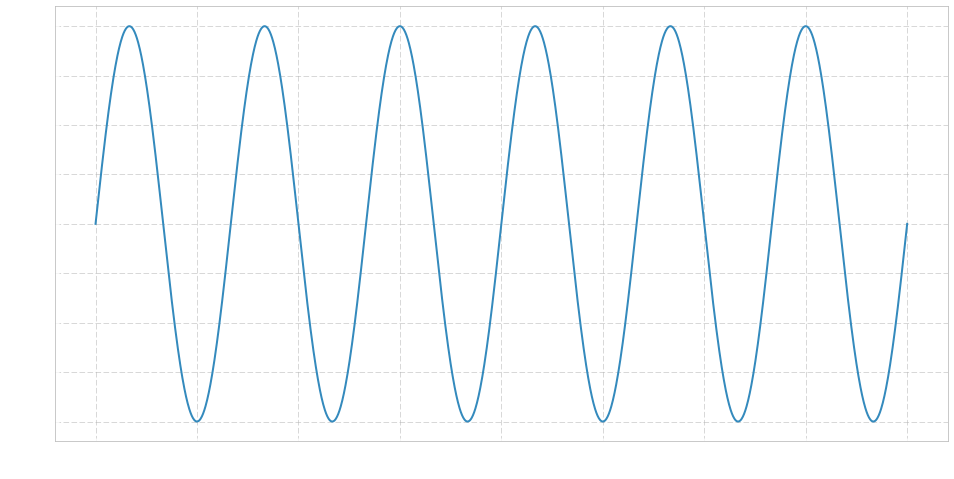

In [60]:
fs = 1000  # sample freq
T = 2  # total period
t = np.linspace(0, T, T * fs + 1)
f0 = 3 # Frequency in Hz
A = 100 # Amplitude in Unit
s = A * np.sin(2 * np.pi * f0 * t) # Signal
plt.plot(t, s)
plt.xlabel('t [s]')
plt.ylabel('Amplitude [unit]')

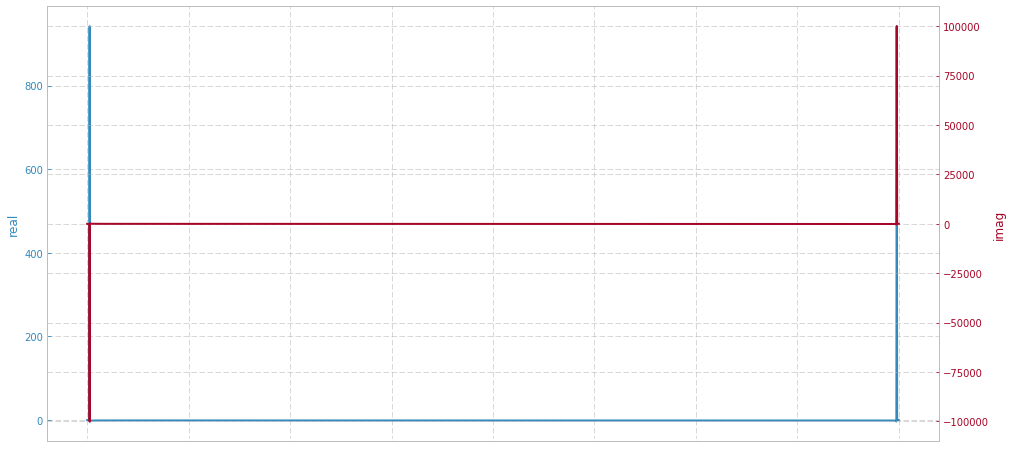

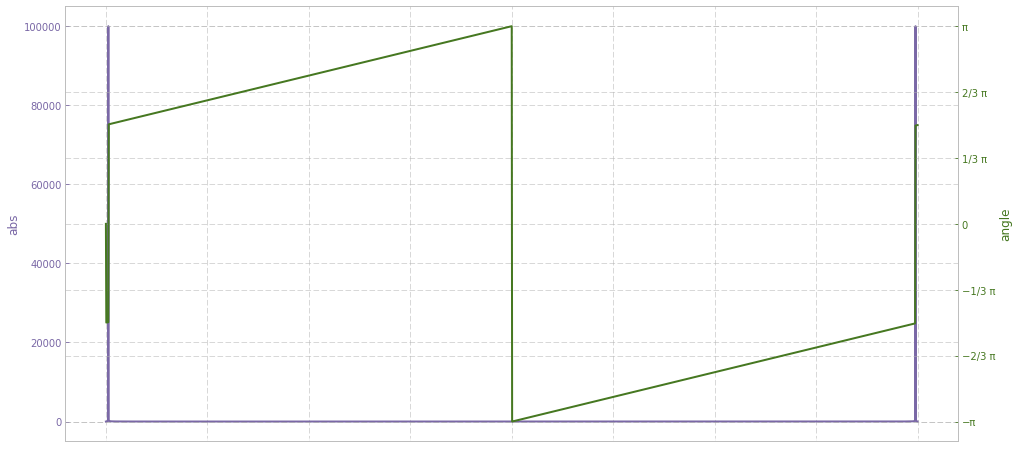

In [61]:
S = np.fft.fft(s)

ax1 = plt.gca()
ax1.plot(S.real, 'C0')
ax1.set_ylabel('real', color='C0')
ax1.tick_params('y', colors='C0')

ax2 = ax1.twinx()
ax2.plot(S.imag, 'C1')
ax2.set_ylabel('imag', color='C1')
ax2.tick_params('y', colors='C1')

plt.figure()

ax1 = plt.gca()
ax1.plot(abs(S), 'C2')
ax1.set_ylabel('abs', color='C2')
ax1.tick_params('y', colors='C2')

ax2 = ax1.twinx()
ax2.plot(np.angle(S), 'C3')
ax2.set_yticks(np.linspace(-np.pi, np.pi, 7))
ax2.set_yticklabels(['−π', '−2/3 π', '−1/3 π', '0', '1/3 π', '2/3 π', 'π'])
ax2.set_ylabel('angle', color='C3')
ax2.tick_params('y', colors='C3')

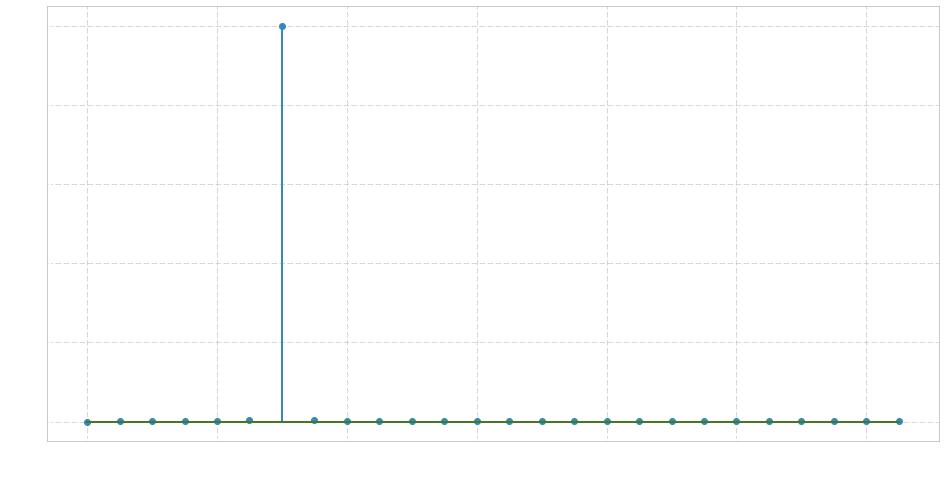

In [62]:
f = np.linspace(0, fs, len(t))
N = len(t) // 75
plt.stem(f[:N], abs(S[:N]) / len(S) * 2)
plt.xlabel('f [Hz]')
plt.ylabel('Amplitude [unit]')

In [141]:
def freq_analysis(video_file_name):

    # load the whole video
    video_data = skvideo.io.vread(video_file_name)

    # compute fft
    video_transform = np.fft.fft(video_data, axis=0)

    # unroll data
    s = video_transform.shape
    v = video_transform.reshape(s[0], s[1] * s[2], s[3])

    fs = 30  # Hz
    f = np.linspace(0, fs, len(video_data))
    N = len(video_data) // 2

    def norm(x): return (abs(x) / video_data.shape[0] * 2 / 255) ** (1)

    for p in range(0, video_transform_unrolled.shape[1], 10000):
        plt.plot(f[:N], norm(v[:N,p,0]), 'C1', alpha=0.5)
        plt.plot(f[:N], norm(v[:N,p,1]), 'C3', alpha=0.5)
        plt.plot(f[:N], norm(v[:N,p,2]), 'C0', alpha=0.5)

    plt.xlabel('f [Hz]')
    plt.ylabel('Amplitude [unit]')

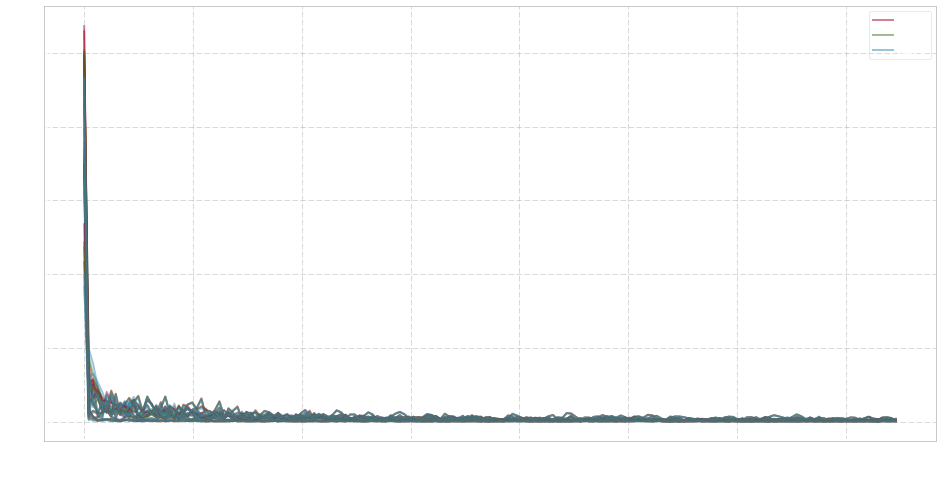

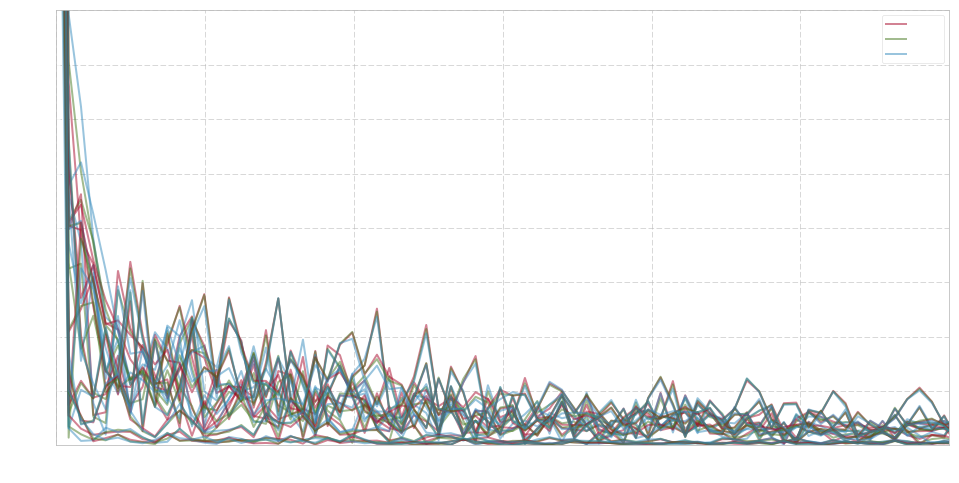

In [142]:
freq_analysis('data/256min_data_set/car/20160706_180451.mp4')
plt.legend(['car R', 'car G', 'car B'])
plt.figure()
freq_analysis('data/256min_data_set/car/20160706_180451.mp4')
plt.axis([0, 6, 0, .2])
plt.legend(['car R', 'car G', 'car B'])

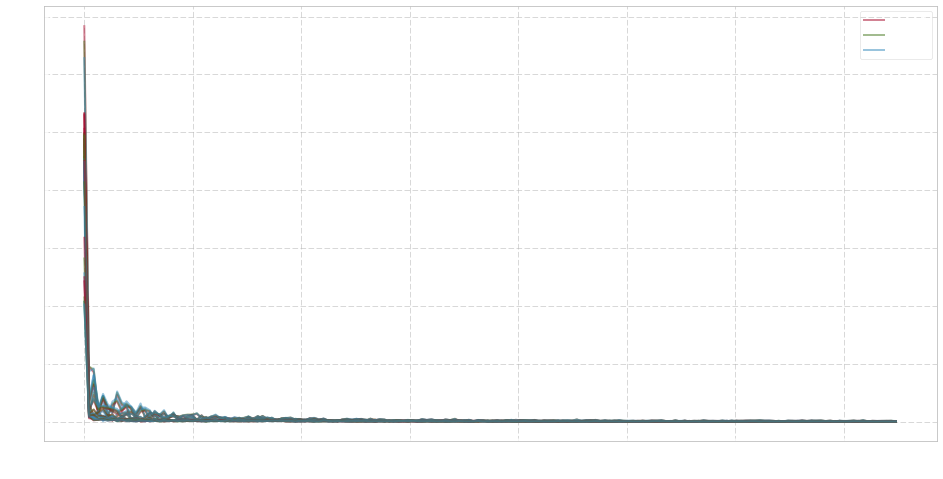

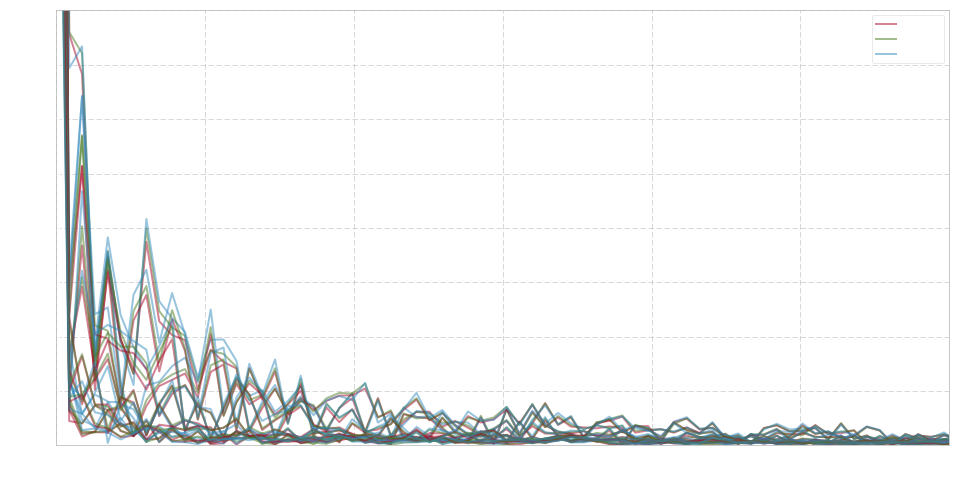

In [143]:
freq_analysis('data/256min_data_set/chair/20160730_090333.mp4')
plt.legend(['chair R', 'chair G', 'chair B'])
plt.figure()
freq_analysis('data/256min_data_set/chair/20160730_090333.mp4')
plt.axis([0, 6, 0, .2])
plt.legend(['chair R', 'chair G', 'chair B'])